In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy import random as rand
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd
from cs771 import utils
from matplotlib import pyplot as plt

# True Gaussian distribution from which data is generated
muAst = 3
sigmaAst = 2

# Number of samples
n = 10

# Get samples
X = rand.normal( muAst, sigmaAst, n )

# Make samples into 2D points so that they can be plotted
X2D = np.ones( (n, 2) ) * -0.1
X2D[:,0] = X

# A global variable (sorry - I know global vars are bad) to plot the MAP estimate
mode = 0

def getPDFGaussian( X ):
    global sigma, mu
    return 1/np.sqrt( 2 * np.pi * np.square(sigma) ) * np.exp( -np.square( X - mu )/(2 * np.square( sigma )) )

def getPDFUniform( X ):
    global a, b
    pdf = np.ones( X.shape ) * 1/(b - a)
    pdf[X < a] = 0
    pdf[X > b] = 0
    return pdf

def getPosterior( W ):
    global mode, priorPDF, X
    prior = priorPDF( W )
    temp = utils.getAllPairsDistances( W[:, np.newaxis], X[:, np.newaxis] )
    likelihood = np.prod( np.exp(-temp/(2 * np.square( sigmaAst ))), axis = 1)
    posterior = np.multiply( prior, likelihood )
    # It is tedious to do the exact integration so we normalize the crude way
    posterior = posterior/np.sum( posterior )
    # Set the mode variable so that we may plot it outside
    mode = W[np.argmax( posterior )]
    return posterior

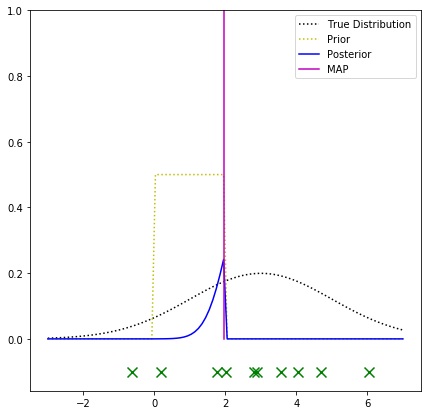

In [3]:
# Uniform Prior
a = 0
b = 2

nBins = 100
priorPDF = getPDFUniform

mu = muAst
sigma = sigmaAst

# We will notice that since the prior excludes the true muAst, the MAP procedure will
# instead offer the model most suitable within the support of the prior (at one extreme)
# end of the support of the prior. On the other hand, if we set the support to be something
# like a = 4, b = 6, then you will find MAP latching on to the other extreme end of the support
# The is no accident -- the MAP does indeed compute a constrained optimization problem in this case

# However, if we use a less restrictive prior that does include the true muAst, for example
# a = -5, b = 5, then the MAP procedure, when given enough data points (say set n = 200 or so)
# will recover muAst very faithfully
fig = pd.getFigure( 7, 7 )
pd.plotCurve( getPDFGaussian, fig, mode = "batch", color = 'k', linestyle = ':', xlimL = -3, xlimR = 7, nBins = nBins, label = "True Distribution" )
pd.plot2D( X2D, fig, color = 'g', marker = 'x', size = 100 )
pd.plotCurve( getPDFUniform, fig, mode = "batch", color = 'y', linestyle = ':', xlimL = -3, xlimR = 7, nBins = nBins, label = "Prior" )
pd.plotCurve( getPosterior, fig, mode = "batch", color = 'b', linestyle = '-', xlimL = -3, xlimR = 7, nBins = nBins, label = "Posterior" )
pd.plotVerticalLine( mode, fig, color = 'm', linestyle = '-', yLimB = 0, yLimT = 1, nBins = nBins, label = "MAP")
plt.ylim( top = 1.0 )
plt.show()

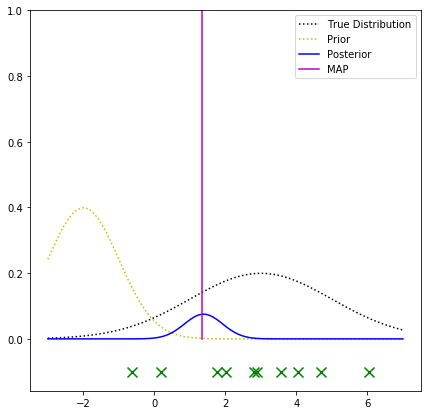

In [4]:
mu = muAst
sigma = sigmaAst

fig2 = pd.getFigure( 7, 7 )
pd.plotCurve( getPDFGaussian, fig2, mode = "batch", color = 'k', linestyle = ':', xlimL = -3, xlimR = 7, nBins = nBins, label = "True Distribution" )
pd.plot2D( X2D, fig2, color = 'g', marker = 'x', size = 100 )

# Let us instead use a Gaussian prior
muPrior = -2
sigmaPrior = 1

mu = muPrior
sigma = sigmaPrior
priorPDF = getPDFGaussian

# Notice that the posterior distribution also looks suspiciously Gaussian in this case.
# Try changing the parameters of the prior and confirm that the posterior continues to
# look like a Gaussian. This is again no accident -- the posterior is actually a Gaussian.
# If our prior and likelihood distributions are both Gaussian then the posterior distribution
# will also be Gaussian -- this is due to a beautiful phenonmenon called conjugacy which
# we will briefly look in this course very soon -- more details in advanced courses like CS772
pd.plotCurve( getPDFGaussian, fig2, mode = "batch", color = 'y', linestyle = ':', xlimL = -3, xlimR = 7, nBins = nBins, label = "Prior" )
pd.plotCurve( getPosterior, fig2, mode = "batch", color = 'b', linestyle = '-', xlimL = -3, xlimR = 7, nBins = nBins, label = "Posterior" )
pd.plotVerticalLine( mode, fig2, color = 'm', linestyle = '-', yLimB = 0, yLimT = 1, nBins = nBins, label = "MAP")
plt.ylim( top = 1.0 )
plt.show()